Problem 1 - Share and run the official tutorial model

Tutorial for beginners

In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [22]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Keep softmax here
])
predictions = model(x_train[:1]).numpy()
predictions

tf.nn.softmax(predictions).numpy()
# Defining a loss function for training using `losses.SparseCategoricalCrossentropy`:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(y_train[:1], predictions).numpy()
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # from_logits=False is the default
    metrics=['accuracy']
)
# training and evaluating the model
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8741 - loss: 0.4314
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9639 - loss: 0.1222
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9769 - loss: 0.0761
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9830 - loss: 0.0566
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9878 - loss: 0.0418


Evaluating the model


In [23]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9770 - loss: 0.0783


[0.07829247415065765, 0.9769999980926514]

Returning the probability of the model

In [24]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.0853372 , 0.08533719, 0.08533791, 0.08533932, 0.08533719,
        0.08533719, 0.08533719, 0.23196223, 0.08533728, 0.08533733],
       [0.08533723, 0.08533909, 0.23196174, 0.08533803, 0.08533722,
        0.08533777, 0.08533722, 0.08533722, 0.08533723, 0.08533722],
       [0.08537082, 0.23144211, 0.08543362, 0.08537189, 0.08540295,
        0.08537439, 0.08537769, 0.08545222, 0.08540409, 0.08537026],
       [0.2319693 , 0.08533674, 0.08533674, 0.08533674, 0.08533674,
        0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
       [0.08535012, 0.08535007, 0.0853501 , 0.08535007, 0.23175827,
        0.08535009, 0.08535011, 0.08535056, 0.08535021, 0.08544043]],
      dtype=float32)>

TensorFlow 2 quickstart for experts


In [25]:
# Importing Tensorflow into the program
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

# loading and preparing the mnist dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

# Using tf.data to batch and shuffle the dataset:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# Building the tf.keras model using the Keras model subclassing API:
class MyModel(Model):
  def __init__(self):
    super().__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

TensorFlow version: 2.18.0


Choose an optimizer and loss function for training:

In [26]:
# Choose an optimizer and loss function for training:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

# Selecting metrics to measure the loss and the accuracy of the model. These metrics accumulate the values over epochs and then print the overall result.
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

Using tf.GradientTape to train the model:

In [27]:
# Using tf.GradientTape to train the model:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

# testing the model
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_state()
  train_accuracy.reset_state()
  test_loss.reset_state()
  test_accuracy.reset_state()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result():0.2f}, '
    f'Accuracy: {train_accuracy.result() * 100:0.2f}, '
    f'Test Loss: {test_loss.result():0.2f}, '
    f'Test Accuracy: {test_accuracy.result() * 100:0.2f}'
  )

Epoch 1, Loss: 0.14, Accuracy: 95.83, Test Loss: 0.06, Test Accuracy: 97.98
Epoch 2, Loss: 0.04, Accuracy: 98.62, Test Loss: 0.05, Test Accuracy: 98.30
Epoch 3, Loss: 0.02, Accuracy: 99.28, Test Loss: 0.05, Test Accuracy: 98.44
Epoch 4, Loss: 0.01, Accuracy: 99.54, Test Loss: 0.06, Test Accuracy: 98.43
Epoch 5, Loss: 0.01, Accuracy: 99.66, Test Loss: 0.06, Test Accuracy: 98.30


Problem 2 - (Advanced problem) Implement various methods

In [28]:
import pandas as pd
# Loading the iris dataset from scikit-learn
from sklearn.datasets import load_iris

# Storing the iris dataset in a variable
data = load_iris()

# Preparing lists for row and column indices
iris_data_columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
iris_target_columns=['Species',]
# Converting to pandas DataFrame
X_data = pd.DataFrame(data=data['data'], columns=iris_data_columns)
y_data = pd.DataFrame(data=data['target'], columns=iris_target_columns)

y_data=y_data.replace({0: 'Iris-setosa', 1: 'Iris-versicolor', 2:'Iris-virginica'})

# Combining X and y along the column axis
df = pd.concat([X_data, y_data], axis=1)
display(df)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [29]:
# Using a neural network implemented in TensorFlow to perform binary classification on the Iris dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Loading the dataset
# Uncomment and specify your dataset path if needed
# dataset_path = "Iris.csv"
# df = pd.read_csv(dataset_path)

# Filtering and preparing the dataset
df_q2 = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df_q2["Species"].copy()
X = df_q2.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values

# Converting labels to numbers
y = np.where(y == "Iris-versicolor", 0, 1).astype(int).reshape(-1, 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

class GetMiniBatch:
    def __init__(self, X, y, batch_size=10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = int(np.ceil(X.shape[0] / self.batch_size))

    def __len__(self):
        return self._stop

    def __getitem__(self, item):
        p0 = item * self.batch_size
        p1 = item * self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = self._counter * self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

# Setting hyperparameters
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

# Placeholders
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Mini-batch iterator for training
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

def example_net(x):
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3']
    return layer_output

# Network
logits = example_net(X)

# Loss and optimizer
loss_op = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=logits))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Metrics
predictions = tf.sigmoid(logits)
correct_pred = tf.equal(tf.round(predictions), Y)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialization
init = tf.global_variables_initializer()

# Training
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        total_loss = 0
        total_acc = 0
        for mini_batch_x, mini_batch_y in get_mini_batch_train:
            _, loss, acc = sess.run([train_op, loss_op, accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y})
            total_loss += loss
            total_acc += acc
        total_loss /= len(get_mini_batch_train)
        total_acc /= len(get_mini_batch_train)
        val_loss, val_acc = sess.run([loss_op, accuracy], feed_dict={X: X_val, Y: y_val})
        print(f"Epoch {epoch + 1}, Loss: {total_loss:.4f}, Val Loss: {val_loss:.4f}, Acc: {total_acc:.3f}, Val Acc: {val_acc:.3f}")
    test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    print(f"Test Accuracy: {test_acc:.3f}")



Instructions for updating:
non-resource variables are not supported in the long term

Epoch 1, Loss: 34.0635, Val Loss: 9.9256, Acc: 0.421, Val Acc: 0.438
Epoch 2, Loss: 3.9368, Val Loss: 9.3914, Acc: 0.757, Val Acc: 0.500
Epoch 3, Loss: 5.1304, Val Loss: 8.7450, Acc: 0.736, Val Acc: 0.688
Epoch 4, Loss: 6.2432, Val Loss: 2.2494, Acc: 0.657, Val Acc: 0.750
Epoch 5, Loss: 0.8559, Val Loss: 1.5456, Acc: 0.900, Val Acc: 0.750
Epoch 6, Loss: 1.4737, Val Loss: 3.2962, Acc: 0.843, Val Acc: 0.812
Epoch 7, Loss: 2.1738, Val Loss: 1.3548, Acc: 0.814, Val Acc: 0.875
Epoch 8, Loss: 0.7770, Val Loss: 0.9560, Acc: 0.929, Val Acc: 0.750
Epoch 9, Loss: 1.0334, Val Loss: 5.3889, Acc: 0.886, Val Acc: 0.750
Epoch 10, Loss: 2.7836, Val Loss: 1.0290, Acc: 0.786, Val Acc: 0.812
Test Accuracy: 0.850


Create an Iris model using all three types of objective variables Create a model that can classify all three types included in the objective variable Species in train.csv of the Iris dataset. Iris Species Consider the difference between two-class classification and three-class or more classification. Please refer to the official documentation to find out how it can be rewritten in TensorFlow. 《Hint》 The following two sections are processes specific to two-class classification.

In [30]:

y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# one-hot-enconding
y_one = pd.get_dummies(y)

y = np.array(y_one)
X = np.array(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Further split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


# Hyperparameter settings
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_hidden1 = 10
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

# CalculationDecide the shape of the arguments to be passed to the graph.
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Mini-batch iterator for training
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

def example_net_iris(x):
    """
    Simple 3-layer neural network
    """
    # Declaration of weights and biases
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3']  # tf.add and + are equivalent
    return layer_output

# Reading the network structure
logits = example_net_iris(X)

# Objective function (modified for multi-class classification using softmax)
# loss_op = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=logits))
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=logits))

# Optimization method
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Predicted results (using argmax for multi-class classification)
# correct_pred = tf.equal(tf.sign(Y - 0.5), tf.sign(tf.sigmoid(logits) - 0.5))
correct_pred = tf.equal(tf.argmax(Y, 1), tf.argmax(tf.nn.softmax(logits), 1))  # axis = 1

# Metric calculation
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Variable initialization
init = tf.global_variables_initializer()

# Running the computation graph
with tf.Session() as sess:
    sess.run(init)  # Variable initialization
    for epoch in range(num_epochs):
        # Looping through each epoch, np.ceil rounds up and down (flooring)
        total_batch = np.ceil(X_train.shape[0] / batch_size).astype(int)
        total_loss = 0
        total_acc = 0
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            # Looping through each mini-batch
            # train_op = AdamOptimizer, gradient descent using the Adam algorithm
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y})
            total_loss += loss
            total_acc += acc
        total_loss /= n_samples
        total_acc /= n_samples
        val_loss, val_acc = sess.run([loss_op, accuracy], feed_dict={X: X_val, Y: y_val})
        print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, acc : {:.3f}, val_acc : {:.3f}".format(epoch, loss, val_loss, acc, val_acc))
    test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    print("test_acc : {:.3f}".format(test_acc))


Epoch 0, loss : 34.2376, val_loss : 40.7104, acc : 0.000, val_acc : 0.292
Epoch 1, loss : 7.1858, val_loss : 14.1717, acc : 0.667, val_acc : 0.500
Epoch 2, loss : 5.5380, val_loss : 5.7234, acc : 0.667, val_acc : 0.625
Epoch 3, loss : 3.5417, val_loss : 3.4755, acc : 0.667, val_acc : 0.625
Epoch 4, loss : 0.1669, val_loss : 0.2464, acc : 1.000, val_acc : 0.875
Epoch 5, loss : 0.0333, val_loss : 0.5458, acc : 1.000, val_acc : 0.875
Epoch 6, loss : 0.0512, val_loss : 0.2946, acc : 1.000, val_acc : 0.833
Epoch 7, loss : 0.0210, val_loss : 0.1416, acc : 1.000, val_acc : 0.917
Epoch 8, loss : 0.0105, val_loss : 0.2605, acc : 1.000, val_acc : 0.833
Epoch 9, loss : 0.0265, val_loss : 0.5400, acc : 1.000, val_acc : 0.792
test_acc : 0.933


Create a model for House Prices Create a model using House Prices, a dataset for regression problems. House Prices: Advanced Regression Techniques Download train.csv from this file and use SalePrice as the objective variable, and GrlivArea and YearBuilt as explanatory variables. You can add more explanatory variables. Please take into consideration the difference between classification problems and regression problems. Since this is a regression problem, use mean squared error as the objective function (loss function). Also, delete Accuracy.

In [31]:
# Loading the dataset
df_house = pd.read_csv('train.csv')

# Extracting conditions from the DataFrame
X = np.array(df_house[['GrLivArea','YearBuilt']])
y = np.array(df_house['SalePrice'])

# Log transformation
X = np.log(np.array(X))
y = np.log(np.array(y))
y = y.reshape(-1, 1)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Further splitting into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Setting hyperparameters
learning_rate = 0.01
batch_size = 32
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

# Deciding the shape of the arguments to pass to the computation graph
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Mini-batch iterator for training
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

def example_net(x):
    """
    Simple 3-layer neural network
    """
    # Declaration of weights and biases
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3']  # tf.add and + are equivalent
    return layer_output

# Loading the network structure
logits = example_net(X)

# Objective function
loss_op = tf.losses.mean_squared_error(Y, logits)

# Optimization method
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Variable initialization
init = tf.global_variables_initializer()

# Running the computation graph
with tf.Session() as sess:
    sess.run(init)  # Variable initialization
    for epoch in range(num_epochs):
        # Looping through each epoch, np.ceil rounds up and down (flooring)
        total_batch = np.ceil(X_train.shape[0] / batch_size).astype(int)
        total_loss = 0
        # total_acc = 0
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            # Looping through each mini-batch
            # train_op = AdamOptimizer, gradient descent using the Adam algorithm
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            loss = sess.run(loss_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            total_loss += loss
        total_loss /= n_samples
        val_loss = sess.run(loss_op, feed_dict={X: X_val, Y: y_val})
        print("Epoch {}, loss : {}, val_loss : {}".format(epoch, loss, val_loss))
    test_loss = sess.run(loss_op, feed_dict={X: X_test, Y: y_test})
    print("test_loss : {:.3f}".format(test_loss))



Epoch 0, loss : 792.2412109375, val_loss : 847.134521484375
Epoch 1, loss : 9.81013298034668, val_loss : 9.77377986907959
Epoch 2, loss : 15.578558921813965, val_loss : 12.64223575592041
Epoch 3, loss : 9.327398300170898, val_loss : 8.554512977600098
Epoch 4, loss : 7.839667797088623, val_loss : 7.574936866760254
Epoch 5, loss : 6.951971530914307, val_loss : 6.767199516296387
Epoch 6, loss : 6.126048564910889, val_loss : 5.960129261016846
Epoch 7, loss : 5.299201488494873, val_loss : 5.16073751449585
Epoch 8, loss : 4.49656867980957, val_loss : 4.382074356079102
Epoch 9, loss : 3.7303855419158936, val_loss : 3.6365530490875244
test_loss : 3.763


Create a MNIST model Create a model to classify MNIST, which was used in the Scratch Neural Network. This is similar to the previous Iris model in that it classifies three or more classes. The difference is that the input is an image. Aim to reproduce the model implemented in Scratch. Prepare the dataset

In [32]:
import tensorflow as tf
import keras

from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder


(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("MNIST shape")
print(X_train.shape)  # (48000, 784)
print(X_test.shape)  # (12000, 784)
print(y_train.shape)
print(y_test.shape)

# Reshaping the data
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Converting to float and normalizing
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train /= 255
X_test /= 255

print("Shape after normalization")
print(X_train.shape)  # (48000, 784)
print(X_test.shape)  # (12000, 784)

# One-hot encoding the labels
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

print("Shape after one-hot encoding")
print(y_train.shape)  # (60000,)
print(y_train_one_hot.shape)  # (60000, 10)

# Splitting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)

print("Shape after train_test_split")
print(X_train.shape)  # (48000, 784)
print(X_val.shape)  # (12000, 784)
print(y_train.shape)
print(y_val.shape)



MNIST shape
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Shape after normalization
(60000, 784)
(10000, 784)
Shape after one-hot encoding
(60000,)
(60000, 10)
Shape after train_test_split
(48000, 784)
(12000, 784)
(48000, 10)
(12000, 10)


In [33]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Setting hyperparameters
learning_rate = 0.01
batch_size = 32
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 10

# Define the shape of the arguments to pass to the computation graph
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Mini-batch iterator for training
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

def example_net(x):
    """
    Simple 3-layer neural network
    """
    # Declaration of weights and biases
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }
    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3']  # tf.add and + are equivalent
    return layer_output

# Loading the network structure
logits = example_net(X)

# Objective function (changed to Softmax)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=logits))

# Optimization method (changed to AdaGrad)
optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)  # Alternative: Adam optimizer
train_op = optimizer.minimize(loss_op)

# Estimation results (changed to use argmax)
correct_pred = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))  # axis = 1

# Metric calculation
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialization of variables
init = tf.global_variables_initializer()

# Running the computation graph
with tf.Session() as sess:
    sess.run(init)  # Initializing variables
    for epoch in range(num_epochs):
        # Looping through each epoch np.ceil = rounding up and down (flooring)
        total_batch = np.ceil(X_train.shape[0] / batch_size).astype(int)
        total_loss = 0
        total_acc = 0
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            # Looping through each mini-batch
            # train_op = AdamOptimizer, gradient descent using the Adam algorithm
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y})
            total_loss += loss
            total_acc += acc
        total_loss /= n_samples
        total_acc /= n_samples
        val_loss, val_acc = sess.run([loss_op, accuracy], feed_dict={X: X_val, Y: y_val})
        print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, acc : {:.3f}, val_acc : {:.3f}".format(epoch, loss, val_loss, acc, val_acc))
    test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test_one_hot})
    print("test_acc : {:.3f}".format(test_acc))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 0, loss : 31.1209, val_loss : 22.9930, acc : 0.656, val_acc : 0.648
Epoch 1, loss : 25.3262, val_loss : 16.7526, acc : 0.688, val_acc : 0.689
Epoch 2, loss : 21.8767, val_loss : 13.9615, acc : 0.688, val_acc : 0.711
Epoch 3, loss : 20.1204, val_loss : 12.2594, acc : 0.688, val_acc : 0.721
Epoch 4, loss : 19.1155, val_loss : 11.1055, acc : 0.688, val_acc : 0.729
Epoch 5, loss : 18.3071, val_loss : 10.2571, acc : 0.656, val_acc : 0.734
Epoch 6, loss : 17.6142, val_loss : 9.5960, acc : 0.688, val_acc : 0.740
Epoch 7, loss : 16.9320, val_loss : 9.0705, acc : 0.656, val_acc : 0.744
Epoch 8, loss : 16.2155, val_loss : 8.6284, acc : 0.656, val_acc : 0.748
Epoch 9, loss : 15.6509, val_loss : 8.2502, acc : 0.656, val_acc : 0.752
test_acc : 0.763


CONVERTING THE ABOVE DATA TO KERAS

Iris (binary classification of Iris-versicolor and Iris-virginica only)

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Debug mode for tf.data (only works if eager execution is enabled, which it is by default in TF 2.x)
try:
    tf.data.experimental.enable_debug_mode()
except ValueError:
    print("Debug mode cannot be enabled. Ensure TensorFlow is running with eager execution.")

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Filter only classes 1 and 2
binary_indices = (y == 1) | (y == 2)
X_binary = X[binary_indices]
y_binary = y[binary_indices] - 1  # Convert labels to 0 and 1

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicit input layer
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Output for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=8)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Debug mode cannot be enabled. Ensure TensorFlow is running with eager execution.
Epoch 1/30


RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.

Corrected Iris Multi-Class Classification Code

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Enable debug mode for tf.data functions
tf.data.experimental.enable_debug_mode()

# Load Iris dataset
data = load_iris()
X, y = data.data, data.target

# One-hot encode the target
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model with explicit Input layer
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicit Input layer
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # Softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=8)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.4406 - loss: 0.8730 - val_accuracy: 0.5333 - val_loss: 0.8531
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6454 - loss: 0.7832 - val_accuracy: 0.6333 - val_loss: 0.8089
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6283 - loss: 0.8026 - val_accuracy: 0.6333 - val_loss: 0.7704
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6365 - loss: 0.7600 - val_accuracy: 0.6333 - val_loss: 0.7355
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6441 - loss: 0.7063 - val_accuracy: 0.6333 - val_loss: 0.7040
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5911 - loss: 0.6936 - val_accuracy: 0.6333 - val_loss: 0.6730
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6868 - loss: 0.6273 - val_accuracy: 0.6333 - val_loss: 0.6409
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7038 - loss: 0.6281 - val_accuracy: 0.6333 - v

 Corrected House Prices Regression Code

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Enable debug mode for tf.data functions
tf.data.experimental.enable_debug_mode()

# Load the House Prices dataset (California Housing)
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model with explicit Input layer
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicit Input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Single neuron for regression output
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 2.2167 - mae: 0.9414 - val_loss: 0.4484 - val_mae: 0.4746
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.4249 - mae: 0.4650 - val_loss: 0.3948 - val_mae: 0.4520
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3797 - mae: 0.4427 - val_loss: 0.4054 - val_mae: 0.4443
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.3680 - mae: 0.4286 - val_loss: 0.3646 - val_mae: 0.4354
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3479 - mae: 0.4170 - val_loss: 0.3459 - val_mae: 0.4196
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3402 - mae: 0.4058 - val_loss: 0.3388 - val_mae: 0.4068
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4002 - mae: 0.4024 - val_loss: 0.3279 - val_mae: 0.3967
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3323 - mae: 0.4008 - val_loss: 0.3235 - val_mae: 0.3964
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step -

Corrected MNIST Classification Code

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Enable debug mode for tf.data functions
tf.data.experimental.enable_debug_mode()

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the input images to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model with explicit Input layer
model = Sequential([
    Input(shape=(28, 28)),  # Explicit Input layer
    Flatten(),  # Flatten 28x28 images
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Softmax for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.8720 - loss: 0.4399 - val_accuracy: 0.9623 - val_loss: 0.1234
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9672 - loss: 0.1081 - val_accuracy: 0.9687 - val_loss: 0.0971
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9788 - loss: 0.0692 - val_accuracy: 0.9726 - val_loss: 0.0852
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9837 - loss: 0.0505 - val_accuracy: 0.9771 - val_loss: 0.0770
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9864 - loss: 0.0407 - val_accuracy: 0.9794 - val_loss: 0.0711
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9898 - loss: 0.0326 - val_accuracy: 0.9765 - val_loss: 0.0770
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9922 - loss: 0.0246 - val_accuracy: 0.9794 - val_loss: 0.0748
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9933 - loss:

Problem 3 - Learning Iris (binary classification) with Keras

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Loading the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Converting the problem into a binary classification: "setosa" vs "not setosa"
# Set label 0 for "setosa", and 1 for others
y_binary = np.where(y == 0, 0, 1)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Normalizing the feature data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the Keras binary classification model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer with feature size
    Dense(16, activation='relu'),      # Hidden layer with 16 neurons and ReLU activation
    Dense(8, activation='relu'),       # Hidden layer with 8 neurons and ReLU activation
    Dense(1, activation='sigmoid')     # Output layer with sigmoid for binary classification
])

# Compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.1, verbose=1)

# Evaluating the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predicting and displaying sample predictions
predictions = (model.predict(X_test) > 0.5).astype("int32")
print("Predictions (first 10):", predictions[:10].flatten())
print("Actual values (first 10):", y_test[:10])


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.3667 - loss: 0.6575 - val_accuracy: 0.3333 - val_loss: 0.6796
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6701 - loss: 0.5801 - val_accuracy: 0.5833 - val_loss: 0.6364
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8039 - loss: 0.5630 - val_accuracy: 0.9167 - val_loss: 0.5972
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8701 - loss: 0.5195 - val_accuracy: 0.9167 - val_loss: 0.5604
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8736 - loss: 0.4827 - val_accuracy: 1.0000 - val_loss: 0.5223
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9697 - loss: 0.4529 - val_accuracy: 1.0000 - val_loss: 0.4823
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9812 - loss: 0.4243 - val_accuracy: 1.0000 - val_loss: 0.4417
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9721 - loss: 0.3656 - val_accuracy: 1.0000 - v

Problem 4 - Learning Iris (multi-value classification) with Keras

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Loading the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Labels: 0 (setosa), 1 (versicolor), 2 (virginica)

# Converting labels to categorical (one-hot encoding)
y_categorical = to_categorical(y, num_classes=3)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Normalizing the feature data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the Keras ternary classification model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer with feature size
    Dense(16, activation='relu'),      # Hidden layer with 16 neurons and ReLU activation
    Dense(8, activation='relu'),       # Hidden layer with 8 neurons and ReLU activation
    Dense(3, activation='softmax')     # Output layer with softmax for ternary classification
])

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Loss for multi-class classification
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.1, verbose=1)

# Evaluating the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predicting and displaying sample predictions
predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)
actual_classes = y_test.argmax(axis=1)

print("Predicted Classes (first 10):", predicted_classes[:10])
print("Actual Classes (first 10):", actual_classes[:10])


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4053 - loss: 1.0832 - val_accuracy: 0.5000 - val_loss: 1.0659
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3718 - loss: 1.0536 - val_accuracy: 0.5000 - val_loss: 1.0412
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5952 - loss: 1.0180 - val_accuracy: 0.5000 - val_loss: 1.0159
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6202 - loss: 1.0006 - val_accuracy: 0.5000 - val_loss: 0.9930
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7064 - loss: 0.9581 - val_accuracy: 0.5000 - val_loss: 0.9655
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7745 - loss: 0.8949 - val_accuracy: 0.7500 - val_loss: 0.9346
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8445 - loss: 0.8592 - val_accuracy: 0.7500 - val_loss: 0.9040
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8594 - loss: 0.8298 - val_accuracy: 0.8333 - val_lo

Problem 5 - Learning House Prices with Keras

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Example data
X = np.random.rand(1000, 10) * 1000  # Replace with your actual dataset
y = np.random.rand(1000, 1) * 1e6   # Large target values

# Preprocessing: Normalize input and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Model definition
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input shape matches number of features
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50, batch_size=32, verbose=1)

# Evaluate
loss, mae = model.evaluate(X_val, y_val)
print("Validation Loss:", loss)
print("Validation MAE:", mae)

# Rescale predictions
predictions = scaler_y.inverse_transform(model.predict(X_val))


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 1.1394 - mae: 0.9021 - val_loss: 0.9732 - val_mae: 0.8485
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1108 - mae: 0.9129 - val_loss: 0.9663 - val_mae: 0.8391
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0127 - mae: 0.8591 - val_loss: 0.9668 - val_mae: 0.8410
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0008 - mae: 0.8639 - val_loss: 0.9601 - val_mae: 0.8371
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9437 - mae: 0.8321 - val_loss: 0.9574 - val_mae: 0.8333
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9140 - mae: 0.8192 - val_loss: 0.9479 - val_mae: 0.8311
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9432 - mae: 0.8394 - val_loss: 0.9610 - val_mae: 0.8329
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9229 - mae: 0.8260 - val_loss: 0.9473 - val_mae: 0.8291
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8834 - mae:

Problem 6 - Learning MNIST with Keras

Training Data Shape: (60000, 28, 28), Training Labels Shape: (60000,)
Test Data Shape: (10000, 28, 28), Test Labels Shape: (10000,)
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8711 - loss: 0.4449 - val_accuracy: 0.9638 - val_loss: 0.1342
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9608 - loss: 0.1339 - val_accuracy: 0.9707 - val_loss: 0.1017
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9754 - loss: 0.0841 - val_accuracy: 0.9728 - val_loss: 0.0981
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9806 - loss: 0.0635 - val_accuracy: 0.9780 - val_loss: 0.0763
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9865 - loss: 0.0460 - val_accuracy: 0.9773 - val_loss: 0.0765
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9881 - loss: 0.0377 - val_accuracy: 0.9772 - val_loss: 0.0780
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9911 - loss:

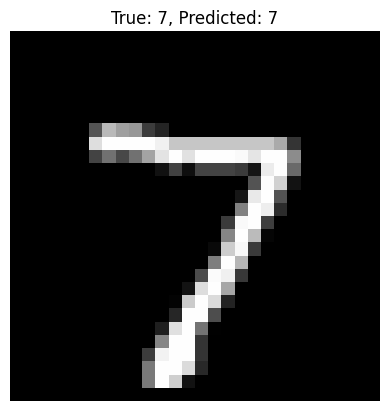

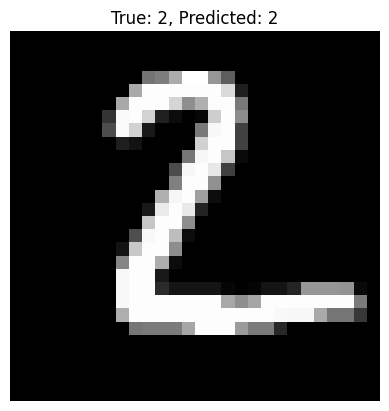

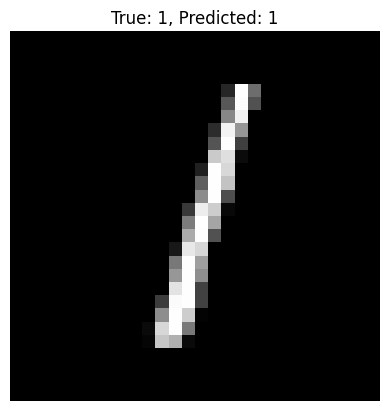

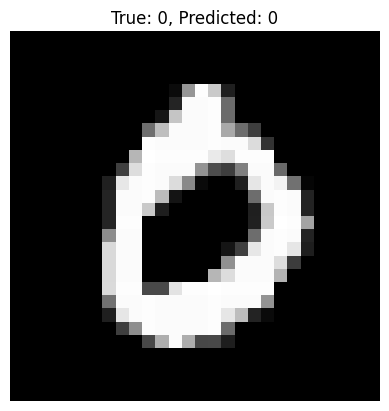

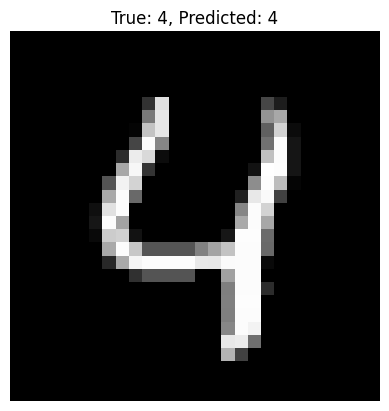

In [20]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Printing dataset shape
print(f"Training Data Shape: {X_train.shape}, Training Labels Shape: {y_train.shape}")
print(f"Test Data Shape: {X_test.shape}, Test Labels Shape: {y_test.shape}")

# Preprocessing the data
X_train = X_train / 255.0  # Normalize pixel values to the range [0, 1]
X_test = X_test / 255.0

# Convert labels to one-hot encoding for multi-class classification
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Building the Keras model
model = Sequential([
    Input(shape=(28, 28)),  # Explicit Input layer
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_split=0.1,  # Reserve 10% of training data for validation
                    epochs=10,
                    batch_size=32,
                    verbose=1)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Making predictions
predictions = model.predict(X_test)

# Plot first 5 test images, predictions, and true labels
for i in range(5):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True: {np.argmax(y_test[i])}, Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()


Problem 7 - (Advanced assignment) Rewriting to PyTorch

Multi-Class Classification: Iris Dataset

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset
data = load_iris()
X = torch.tensor(data.data, dtype=torch.float32)
y = torch.tensor(data.target, dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
class IrisModel(nn.Module):
    def __init__(self):
        super(IrisModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(4, 16),  # Input size = 4 features
            nn.ReLU(),
            nn.Linear(16, 3)   # Output size = 3 classes
        )
    def forward(self, x):
        return self.fc(x)

model = IrisModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

# Evaluate the model
with torch.no_grad():
    test_outputs = model(X_test)
    predictions = torch.argmax(test_outputs, axis=1)
    accuracy = (predictions == y_test).sum().item() / y_test.size(0)
    print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 1.00


Binary Classification: Iris Dataset

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load and preprocess the dataset
data = load_iris()
X = torch.tensor(data.data, dtype=torch.float32)
y = torch.tensor((data.target == 0).astype(int), dtype=torch.float32)  # Binary: Setosa (1) vs Others (0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
class BinaryIrisModel(nn.Module):
    def __init__(self):
        super(BinaryIrisModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(4, 16),  # Input size = 4 features
            nn.ReLU(),
            nn.Linear(16, 1)   # Output size = 1 (binary)
        )
    def forward(self, x):
        return self.fc(x)

model = BinaryIrisModel()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(X_train).squeeze()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

# Evaluate the model
with torch.no_grad():
    test_outputs = torch.sigmoid(model(X_test).squeeze())
    predictions = (test_outputs > 0.5).float()
    accuracy = (predictions == y_test).sum().item() / y_test.size(0)
    print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 1.00


Regression Problem: Housing Prices Dataset

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset
data = fetch_california_housing()
scaler = StandardScaler()
X = torch.tensor(scaler.fit_transform(data.data), dtype=torch.float32)
y = torch.tensor(data.target, dtype=torch.float32).unsqueeze(1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
class HousingModel(nn.Module):
    def __init__(self):
        super(HousingModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(8, 32),  # Input size = 8 features
            nn.ReLU(),
            nn.Linear(32, 1)   # Output size = 1 continuous value
        )
    def forward(self, x):
        return self.fc(x)

model = HousingModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

# Evaluate the model
with torch.no_grad():
    test_outputs = model(X_test)
    mse = criterion(test_outputs, y_test)
    print(f"Test MSE: {mse.item():.4f}")


Test MSE: 0.4451


Image Classification: MNIST Dataset

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Data preprocessing
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 14 * 14, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 32 * 14 * 14)
        x = self.fc1(x)
        return x

model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
for epoch in range(5):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:06<00:00, 1.42MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 147kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.15MB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.27MB/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Test Accuracy: 98.38%


Problem 8 - (Advanced assignment) Comparing frameworks

PyTorch

PyTorch is widely regarded as the most flexible and Pythonic deep learning framework. It is known for its dynamic computation graphs, which allow for flexible model building and debugging. PyTorch is fast and works well with GPUs, making it a popular choice for researchers. The code written in PyTorch is clean, concise, and closely follows Python's syntax, making it very readable. This framework is particularly suited for complex operations, custom models, and experimental research tasks like natural language processing (NLP) and computer vision (CV).

TensorFlow

TensorFlow, developed by Google, focuses on production readiness and scalability. It utilizes static computation graphs, which allow for efficient execution and deployment of models. TensorFlow's performance is highly optimized for large-scale training and inference. While TensorFlow offers many advanced tools like TensorBoard for visualization, TensorFlow Lite for mobile deployment, and TensorFlow Serving for serving models, the code can feel more verbose and less intuitive compared to PyTorch.


Keras

Keras is a high-level API that simplifies deep learning workflows. It runs on top of TensorFlow and focuses on ease of use, readability, and rapid prototyping. Keras makes it possible to write deep learning models with just a few lines of code, making it perfect for beginners or anyone working on standard tasks like classification and regression. While Keras abstracts much of the complexity, it may lack the fine-grained control that frameworks like PyTorch offer. Performance-wise, it relies on the TensorFlow backend, so it can be slightly slower than native PyTorch or TensorFlow.